# Homework 5, Part 1: Building a pandas cheat sheet

**Use `animals.csv` to answer the following questions.** The data is small and the questions are pretty simple, so hopefully you can use this for pandas reference in the future.

## First: things I want you to know first

### Counting things

If during class we had wanted to know how many countries were on each continent, I would use `df.continent.value_counts()`.

Lots of people like to try `groupby` when you're counting things, but in pandas there is only one rule: **every time you want to count things and think you should use groupby.... don't use `groupby`!** Instead use `value_counts()`.

### Data types

Just like you can have strings and integers in Python, each column can have a different data type. You can run `df.dtypes` or `df.info()` to get the data types of each column.

* `int64` is an integer
* `float64` is a float/decimal
* `object` is *anything else*. This normally means a string.

You can also (try to) convert between types! In normal Python it might be `int(age)`, but with pandas you'll use `df.age.astype(int)`


### Graphing things

Just put `.plot()` on the end of whatever you're looking at. It works like 75% of the time!

```python
df.groupby('continent').population.sum().plot(kind='barh')
```

The code above will give me a horizontal bar graph of the sum of each continent's population. Technically speaking it works because the result of the `groupby` and `sum` is a Series, matplotlib plots the index compared to the values. 

If you have a full dataframe, though, you usually need to give it the `x` and `y`.

```python
df.plot(x='life_expectancy', y='per_capita_gdp', kind='scatter')
```

This will give you a scatterplot of each country's life expectancy vs. its per-capita GDP.

If you want to use Altair, though, you can find details [on its website](https://altair-viz.github.io/). We'll cover it a lot more in the future!

## 0) Setup

Import pandas **with the correct name**.

In [46]:
import pandas as pd

## 1) Reading in a csv file

Use pandas to read in the animals CSV file, saving it as a variable with the normal name for a dataframe

In [47]:
df = pd.read_csv("animals.csv")

## 2) Checking your data

Display the number of rows and columns in your data. Also display the names and data types of each column.

> **TIP:** Use `df.dtypes` or `df.info()` to see the data types of your rows!

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   animal  7 non-null      object
 1   name    7 non-null      object
 2   length  7 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 296.0+ bytes


In [49]:
df.dtypes

animal    object
name      object
length     int64
dtype: object

In [50]:
df.length = df.length.astype(float)

## 3) Display the first 3 animals

Hmmm, we know how to take the first 5, but we really just want the first 3. Maybe there is an option to change how many you get?

> **Tip:** Use `shift+tab` or `?` to check the documentation on commands

In [51]:
df.head(3)

,animal,name,length
0,cat,Anne,35.0
1,cat,Bob,45.0
2,dog,Egglesburg,65.0


## 4) Sort the animals to show me the 3 longest animals

> **TIP:** You can use `.head()` after you sort things!

In [52]:
df.sort_values(by='length', ascending = False).head(3)

,animal,name,length
2,dog,Egglesburg,65.0
3,dog,Devon,50.0
1,cat,Bob,45.0


## 5) Get the mean and standard deviation of animal lengths

You can do this with separate commands or with a single command.

> **Tip:** You don't know how to do standard deviation, but remember when we did `df.so` and hit tab and it suggested some options for sorting? I'm assuming the standard deviation method starts with `s`....

In [53]:
print("The standard deviation of animal lengths", round(df.length.std(),2))

print("The mean of animal lengths",round(df.length.mean(),2))




The standard deviation of animal lengths 17.1
The mean of animal lengths 38.86


## 6) How many cats do we have and how many dogs?

In [54]:
df.groupby(['animal'])['animal'].count()

animal
cat    4
dog    3
Name: animal, dtype: int64

## 7) Only display the dogs

> **TIP:** It's probably easiest to make it display the list of `True`/`False` first, then wrap the `df[]` around it.

In [55]:
dogs = df[df['animal'] == 'dog'] #='TRUE'

dogs

,animal,name,length
2,dog,Egglesburg,65.0
3,dog,Devon,50.0
5,dog,Fontaine,35.0


In [56]:
# df.loc[df['animal'] == 'dog'] == TRUE #---- loc is to access the label 
# df.loc[df['animal'] != 'dog'] ='FALSE'

# 'dog' in df['animal']

# df_dog = print(df['dog'].isin(['animal']))

In [57]:
#alternative need to figure


# dogs2= df.query('animal == dog', inplace=True)

# dogs2

## 8) Only display the animals that are longer than 40cm

Do this in **a different way than you did the dogs display**

> **TIP:** While the `df[...]` technique is by far the popular approach, `df.query` is (I think) more readable.

In [58]:
df[(df['length'] >= 40)]


,animal,name,length
1,cat,Bob,45.0
2,dog,Egglesburg,65.0
3,dog,Devon,50.0


In [59]:
#alternative

# df.query('length > 40')
#if I inplace = True it changes the data ig....if i dont it doen't give me the output I want

# df

## 9) `length` is the animal's length in centimeters. Create a new column called `inches` that is the length in inches.

> **TIP:** If your first try fails, remember there are multiple ways to talk about columns, but only one way works to create new ones.

In [60]:
df['length(in)']= df['length'] // 2.54

df

,animal,name,length,length(in)
0,cat,Anne,35.0,13.0
1,cat,Bob,45.0,17.0
2,dog,Egglesburg,65.0,25.0
3,dog,Devon,50.0,19.0
4,cat,Charlie,32.0,12.0
5,dog,Fontaine,35.0,13.0
6,cat,Xypher,10.0,3.0


## 10) Save just the cats to a separate variable called `cats`. Save just the dogs to a separate variable called `dogs`.

This is the same as listing them, but you just save the result to a variable instead of looking at it. Be sure to use `.head()` to make sure your data looks right.

Once you do this, every time you use `cats` you'll only be talking about the cats, and same for the dogs.

In [61]:
dogs = df[df['animal'] == 'dog'] 

dogs.head()

,animal,name,length,length(in)
2,dog,Egglesburg,65.0,25.0
3,dog,Devon,50.0,19.0
5,dog,Fontaine,35.0,13.0


In [62]:
cats = df[df['animal'] == 'cat']

cats

,animal,name,length,length(in)
0,cat,Anne,35.0,13.0
1,cat,Bob,45.0,17.0
4,cat,Charlie,32.0,12.0
6,cat,Xypher,10.0,3.0


## 11) Display all of the animals that are cats and above 12 inches long.

First do it using the `cats` variable, then also do it using your `df` dataframe.

> **TIP:** For multiple conditions, you use `df[(one condition) & (another condition)]`

In [63]:
df[(df['animal'] == 'cat') & (df['length(in)'] >= 12)]


,animal,name,length,length(in)
0,cat,Anne,35.0,13.0
1,cat,Bob,45.0,17.0
4,cat,Charlie,32.0,12.0


## 12) What's the mean length of a cat? What's the mean length of a dog?

In [64]:
add= df.groupby(['animal'])['length'].sum()
totals= df.groupby(['animal'])['length'].count()

average = add / totals  

print(average)

animal
cat    30.5
dog    50.0
Name: length, dtype: float64


## 13) If you didn't already, use `groupby` to do #12 all at once

## 14) Make a [histogram](https://www.tibco.com/reference-center/what-is-a-histogram-chart) of the length of dogs.

This is the worst histogram ever.

> **TIP:** It **does not** use `plot()`.

In [65]:
# print("dogs : ",'*'*dogs.count())
# print('cats : ','+'*cats.count())

# print(dogs.count())

# for dog in dogs:



# import numpy as np

# df
# # array = np.genfromtxt('animals.csv', delimiter=',')
# # print(array)

# # new_array = np.delete(array, np.where(np.isnan(array)))
# # # print(new_array)

# # new_array = array[~np.isnan(array)] # I dont understand this; but i did it cause i got frustrated and i cant remove that  '.'       (>_<)

# # print(new_array)


In [67]:
dogs_list = dogs['name'].tolist()
dogs_lengths = dogs['length'].tolist()
dogs_len = [int(lengths) for lengths in dogs_lengths]

doggy = {key:value for key,value in zip(dogs_list,dogs_len)}

for doggos in doggy:
    print(doggos, '#'*doggy[doggos])

Egglesburg #################################################################
Devon ##################################################
Fontaine ###################################


In [70]:
cats_list = cats['name'].tolist()
cats_lengths = cats['length'].tolist()
cats_len = [int(lengths) for lengths in cats_lengths]

cattos = {key:value for key,value in zip(cats_list,cats_len)}

for kittys in cattos:
    print(kittys, '+'*cattos[kittys])

Anne +++++++++++++++++++++++++++++++++++
Bob +++++++++++++++++++++++++++++++++++++++++++++
Charlie ++++++++++++++++++++++++++++++++
Xypher ++++++++++


## 15) Make a horizontal bar graph of the length of the animals, with the animal's name as the label

> **TIP:** It isn't `df['length'].plot()`, because it needs *both* columns. Think about how we did the scatterplot in class.
>
> **TIP:** Which is the `x` axis and which is the `y` axis? You'll notice pandas is kind of weird and wrong.
>
> **TIP:** Make sure you specify the `kind` of graph or else it will be a weird line thing
>
> **TIP:** If you want, you can set a custom size for your plot by sending it something like `figsize=(15,2)`

<Axes: ylabel='name'>

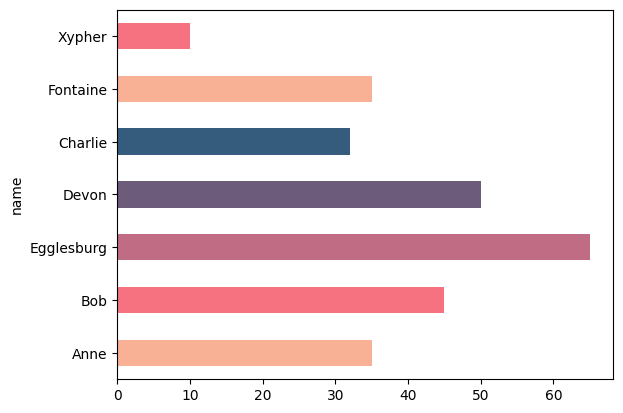

In [ ]:
# df.plot(kind='bar', x='name', y='length')

df.plot(kind='barh', x='name', y='length', legend=False, color=['#F8B195','#F67280','#C06C84','#6C5B7B','#355C7D']) #barh : bar horizontal

## 16) Make a sorted horizontal bar graph of the cats, with the larger cats on top

> **TIP:** Think in steps, even though it's all on one line - first make sure you can sort it, then try to graph it.

<Axes: ylabel='name'>

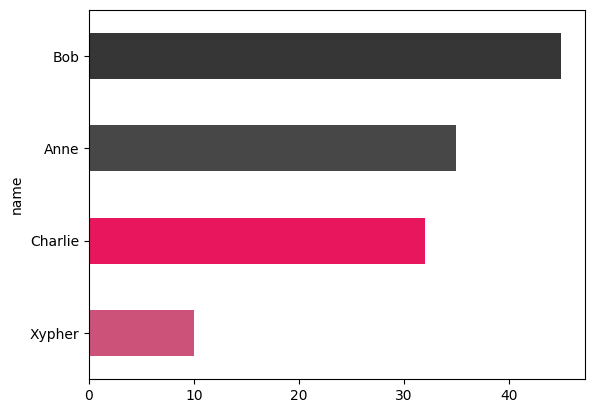

In [ ]:
df[df['animal'] == 'cat'].sort_values(by='length').plot(kind='barh', x='name', y='length', legend=False, color=['#CC527A','#E8175D','#474747','#363636']) 

## 17) As a reward (...is it a reward?) for this being the last question: run the following code, then plot the number of dogs vs. the number of cats

When you are done, be sure to tell Dhrumil that FiveThirtyEight has been lonely without him.

> **TIP:** Counting the number of dogs and number of cats does NOT use `.groupby`! That's only for calculations.
>
> **TIP:** You can set a title with `title="Number of animals"`

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

animal
cat    4
dog    3
Name: count, dtype: int64


<Axes: title={'center': 'Number of animals'}, xlabel='animal'>

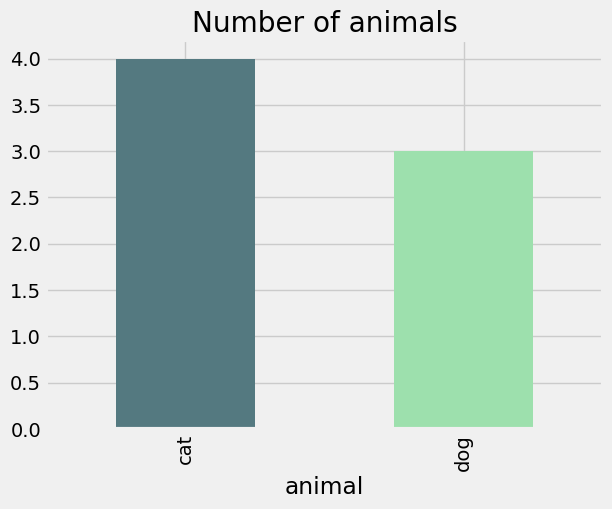

In [ ]:
# counts=df.count()

animal_counts = df.animal.value_counts()
print(animal_counts)
# animal_counts.plot(title="Number of animals", x='animal',y='')

df.animal.value_counts().plot(title="Number of animals", kind='bar', x='animal', y='count', color=['#547980','#9DE0AD'])